<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sean Nicolás González Vázquez y Doris Gomez Contreras.

**Fecha:** 15 de octubre del 2020.

**Expediente** : 720083, 713897.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7. Metodos de Reduccion de Varianza

### El link donde se evidencia el trabajo es el siguiente: [GitHub Repositorio](https://github.com/nicoglez/Tareas_SNGonzalez_DGomez)

## Enunciado de tarea 

> **Ejercicio 1.** Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado
>$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$
>Pasos
>1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
>2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe 

> **Ejercicio 2**

<img style="float: left; margin: 30px 15px 15px 15px;" src= 'https://lh3.googleusercontent.com/m2iE8srueLQktUOrVHnouqbkk-uMEM7yYnPw_REAfwcrfJGoti4QC_mPcMUwyS7n6tJbRR5ZqSSlWOBl7GTBDdxFspGl0gXzxv-1BfiT-FwuCZphqBrvLLNnep_9MLOrjFAPUfUoP9Utb5ShvI3ytuVZckPjOHz5fq2HBOhJibXNs8NQBeGYbOr7qUmM_0xK_bhET0GQO2XIXZKCavpINeKelTqleGUPIQ5iNLHuUP15afLCLF4qO4UHx7IV7Z-U7t4SNBu-4uA2re5DgaUwgX5Oxkl72_TAyOUAgMmQ8UBpc-lEsASi4ePqLo93yCwIQBKaGAvVFeXoRl7c9gXi4KSfoKKgXOpguhEl0NpbBoKJDsD__-A1QP-KDCFgqqC20BadZjoY09z81cL2Z7asjeFl-fPVYpN_mhv5J0rEgfbFmOi6GGQVbcJesVns3CihbPEBLV0rm6TsAbI5b_3aqgdoyYktYHnM5La_I6SmoQ6KtafTxi4Gj_CnR36ZhK4izg1qba2H6kSqIowmiiLmHpfLN937dlKvWl2amijSo_jyt8PGPdzIegndaeIdd3Gq4e8lzkfgM9X3rtoSZNmJb_EExI1X-jk4O76m1MXG_UMhF5HUp2sV0cYPw6UnHyStxs1-g0nWqR2gPgi08IGKKNqU4v8vJrfic6e75ohfgFr90DSiaO-6AvMZaFbD=w649-h545-no?authuser=0' width="400" height="500" /> 
  
   
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

**Importacion de librerias**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

# Solucion de los Ejercicios

> **Ejercicio 1.** Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado
>$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$
>Pasos
>1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
>2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe 


### Solucion Nicolas

In [2]:
# funcion muestreo estratificado
def met_estratificado(N: 'Cantidad de estratos'):
    '''Funcion que realiza el metodo de muestreo estratificado, retorna variales aleatorias estratificadas'''
    B = N 
    U = np.random.rand(B)
    i = np.arange(0,B)
    strat = (U+i)/B
    return strat

In [3]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [4]:
a=0 ; b=1 ; I = 1/3; func = lambda x: x**2 # variables/func iniciales
N = np.logspace(1,7,7,dtype=int) # Cantidad de términos, en escala logarítmica

# Integral con metodo de MONTECARLO CURDO
U = [np.random.uniform(a,b,i) for i in N] # compresion para generar aleatorios en funcion de cada N diferente
integral = [int_montecarlo(func,a,b,u) for u in U] # integrar la funcion para cada u generada

# Integral con metodo estratificado
strat = [met_estratificado(n) for n in N] # Aplicar metodo estratificado a n variables
integral_strat = [int_montecarlo(func,a,b,s) for s in strat] # Evaluar 

In [5]:
# Crear data frame 
df = pd.DataFrame()
df['Cant Terminos'] = N
df.set_index('Cant Terminos', inplace = True)
# datos montecarlo crudo
df['Montecarlo crudo'] = integral
df['% Error Relativo 1'] = np.abs(df['Montecarlo crudo'] - I)*100/I
# datos metodo estratificado
df['Muestreo Estratificado'] = integral_strat
df['% Error Relativo 2'] = np.abs(df['Muestreo Estratificado'] - I)*100/I
df

,Montecarlo crudo,% Error Relativo 1,Muestreo Estratificado,% Error Relativo 2
Cant Terminos,,,,
10,0.169997,49.000875,0.337445,1.233589e+00
100,0.350282,5.084670,0.333249,2.526583e-02
1000,0.329100,1.269964,0.333327,1.832269e-03
10000,0.331665,0.500376,0.333334,9.192905e-05
100000,0.333210,0.037013,0.333333,3.887221e-06
1000000,0.333159,0.052179,0.333333,2.248948e-07
10000000,0.333524,0.057281,0.333333,1.144301e-09


### Solucion Doris

In [7]:
# respuesta 1
def i_monte(f,a,b,U):
    '''f = Función a integrar
        a = límite inferior
        b = límie superior
        Muestra de números U~(ab)
        '''
    return (b-a)/len(U)*np.sum(f(U))

def estratificado(B):
    '''Esta función realiza el método de muestreo estratificado.
        B: Cantidad de estratos.'''
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return v#m_estratificado
estratificado(10)

array([0.02080606, 0.10727627, 0.23463438, 0.37801087, 0.42380092,
       0.54064303, 0.60279768, 0.73414183, 0.85002667, 0.939441  ])

In [8]:
# respuesta 2
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)



# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:i_monte(lambda x:x**2,a,b,Y),ui))


## estratificado:
ui_est = list(map(lambda x: estratificado(x), N))

fx = lambda x: x**2
I_m_est = list(map(lambda Y:fx(Y),ui_est))
I_m_est = list(map(lambda Y:np.mean(Y),I_m_est))


df = pd.DataFrame(index=N,columns=['Montecarlo.Crudo', 'Error_relativo 1%','Muestreo.Estratificado', 'Error_relativo 2%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,'Montecarlo.Crudo'] = I_m
df.loc[N,"Error_relativo 1%"] = np.abs(df.loc[N,"Montecarlo.Crudo"]-I)*100/I
df.loc[N,"Muestreo.Estratificado"] = I_m_est
df.loc[N,"Error_relativo 2%"] = np.abs(df.loc[N,"Muestreo.Estratificado"]-I)*100/I
df

,Montecarlo.Crudo,Error_relativo 1%,Muestreo.Estratificado,Error_relativo 2%
Cantidad_terminos,,,,
10,0.269080,19.275926,0.305508,8.347687e+00
100,0.372235,11.670426,0.333296,1.113142e-02
1000,0.340739,2.221614,0.333311,6.552623e-03
10000,0.329311,1.206614,0.333333,8.527781e-05
100000,0.335400,0.619876,0.333333,5.280394e-06
1000000,0.333080,0.076021,0.333333,5.885903e-08
10000000,0.333109,0.067394,0.333333,3.629463e-09


> **Ejercicio 2**
> Consider the probability distribution whose probability density function is 

$$ f(x) =
  \begin{cases}
    {\frac{3}{2}x^2}       & \text{if }-1\leq x \leq 1\\
    0  &  otherwise
  \end{cases}
$$

The problem is to perform a simulated experiment, with the help of variance-reducing techniques, for estimating the mean of this distribution. To provide a standard of comparison, also derive the mean analytically.
For each of the following cases, use the same 10 uniform random numbers (obtained as instructed at the beginning of the problems section) to generate random observations, and calculate the resulting estimate of the means.
* a) Use the crude Monte Carlo technique.
* b) Use the stratified sampling with three strata $0 \leq F(x) \leq 0.6 , \ 0.6 \leq F(x) \leq 0.9\ and \ 0.9 < F(x) \leq 1$ with 3, 3, and 4 observations respectively.
* c) Use the method of complementary random numbers

Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.


### Solucion Nicolas

### Metodo analitico

$$E[x] = \int_{-1}^{1}x f(x) dx$$
$$E[x] = \int_{-1}^{1}\frac{x^3}{2} dx$$
$$E[x] = [\frac{3x^4}{8}]_{-1}^{1}$$
$$E[x] = 0$$


Metodo de la transformada inversa 
$$f(x) = \frac{3x^2}{2}$$
$$F(X) = \int_{-1}^{x} \frac{3x^2}{2}dx$$
$$F(x) = [\frac{x^3}{2}]_{-1}^{x}$$
$$F(X) = \frac{x^3}{2} + \frac{1}{2}$$

$$U = \frac{x^3}{2} + \frac{1}{2} $$
$$x = (2U-1)^{1/3}$$

Inciso a) Montecarlo crudo

In [57]:
# Montecarlo crudo
np.random.seed(555)
fx = lambda x: 3/2*x**2 if -1 <= x <= 1 else 0 # definir r 
Fx = lambda u: (2*(u-0.5))**(1/3) if u > 0.5 else -(2*(0.5-u))**(1/3)
N = 10
num = np.random.uniform(0, 1, N) # definir max
var_aleatorias = [Fx(n) for n in num]
print('La media con montecarlo crudo es de',np.array(var_aleatorias).mean())

La media con montecarlo crudo es de 0.15697612916795828


Inciso b) Estratificados en diferentes intervalos

In [59]:
np.random.seed(555)
# Generar numeros aleatorios entre los intervalores correspondientes
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)
# Los almacenamos en una lista
r  = [r1,r2,r3]
# Cantidad de estratos
m  = range(len(r)) 
# Pesos de cada estrato
w  = [1/2,1,4]

xi = [np.asarray([Fx(x) for x in ri]) for ri in r]
xiwi = list(map(lambda x, wi: x/wi,xi, w)) 
muestras = np.concatenate(xiwi)
print('La media con estratificados en diferentes intervalos es de', muestras.mean())

La media con estratificados en diferentes intervalos es de 0.13236333378077703


Inciso c) Numeros complementarios

In [71]:
np.random.seed(555)
U = np.random.uniform(0,1,5)
FU = np.array([Fx(u) for u in U])
U2 = 1-U
FU2 = np.array([Fx(u) for u in U2])

print('La media con numeros complementarios es de', (FU.mean()+FU2.mean())/2)

La media con numeros complementarios es de 0.0


Estratificado uniforme con B = 2,4,6,10

In [72]:
np.random.seed(555)
# funcion muestreo estratificado
def met_estratificado(N: 'Cantidad de estratos'):
    '''Funcion que realiza el metodo de muestreo estratificado, retorna variales aleatorias estratificadas'''
    B = N 
    U = np.random.rand(B)
    i = np.arange(0,B)
    strat = (U+i)/B
    return strat

B = np.array([2,4,6,10])
var = [met_estratificado(Bi) for Bi in B]

print('La media con 2 estratos igualmente espaciados es de', np.array([[Fx(xi) for xi in x] for x in var][0]).mean())
print('La media con 4 estratos igualmente espaciados es de', np.array([[Fx(xi) for xi in x] for x in var][1]).mean())
print('La media con 6 estratos igualmente espaciados es de', np.array([[Fx(xi) for xi in x] for x in var][2]).mean())
print('La media con 10 estratos igualmente espaciados es de', np.array([[Fx(xi) for xi in x] for x in var][3]).mean())

La media con 2 estratos igualmente espaciados es de -0.14641883090847083
La media con 4 estratos igualmente espaciados es de 0.03619349170473102
La media con 6 estratos igualmente espaciados es de -0.008075897794051545
La media con 10 estratos igualmente espaciados es de -0.004503997440142104


conclusion nicolas 

podemos notar que el hecho de usar algun metodo de reduccion de varianza en este caso si disminuyo el error relativo respecto al valor obtenido y al valor analitico de la integral, por lo cual se tuvo un buen resultado en cualquiera de los casos, cabe destacar que algunos se acercaron mas que otros, el que mas tendio a la media real fue el de numeros complementarios y el de numeros estatificados igualmente espaciados, que en mi opinion son los mas sencillos de acuerdo a codigo, por lo cual tal vez estos, pero entiendo el hecho de que es importante tener diferentes herramientas para disminuir la varianza

### Solucion Doris

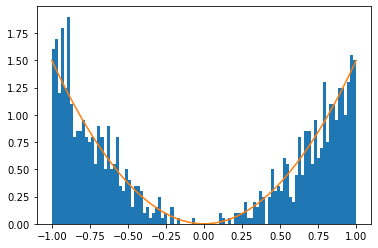

In [73]:
f_x=lambda x: (3/2)*x**2 if x>=-1 and x<=1 else 0 

f_1 = lambda x: x**(1/3) if x>=0 else -(-x)**(1/3) ## esto queeee o pqqq?
f_2 = lambda u: f_1(2*u-1)

N= 1000
u1= np.random.uniform(0,1,N)

f_u1= list(map(lambda x:f_2(x), u1))
f_u1 = np.asarray(f_u1)
y, x, p= plt.hist(f_u1, bins= 100, density=True)
y2= list(map(lambda x: f_x(x), x))
plt.plot(x,y2)
plt.show()

In [74]:
crudo=f_u1.mean()
crudo

-0.028167742250411548

In [75]:
np.random.seed(100)
r1= np.random.uniform(0,.6,3)
r2= np.random.uniform(.6,.9,3)
r3= np.random.uniform(.9,1,4)
r=[r1,r2,r3]

r=[r1, r2, r3]
w=(((3/10)/.6),((3/10)/.3),((4/10)/.1))

f_u2= list(map(lambda x,a: np.asarray([f_2(i) for i in x])/a,r,w))
estratificado=np.concatenate(f_u2).mean()
estratificado

-0.16346936901447945

In [76]:
u1= np.random.rand(5)
u2= 1-u1
Uc=np.concatenate([u1,u2])

f_u3= list(map(lambda u:np.asarray([f_2(u) for u in x]), Uc))
f_u3 
comp =np.mean(f_u3)
comp

-0.6208146673829115

In [77]:
f_xi = lambda u: -(-2*u+1)**(1/3) if u<.5 else (2*u-1)**(1/3)

def estratif(B):
    U2 = np.random.rand(B)
    
    i = np.arange(0,B)
    
    v = (U2+i)/B
    
    return v

N_estratos = [2, 4, 6, 10]
muestras = list(map(estratif,N_estratos))
al = list(map(lambda m_i:list(map(lambda m:f_xi(m),m_i)),muestras))
m_estra = list(map(lambda i:np.mean(i),al))

resultados = list(map(lambda b,mean:print('Estimacíon de la media para %i estratos es %2.4f'%(b,mean)),N_estratos,m_estra))

Estimacíon de la media para 2 estratos es 0.3276
Estimacíon de la media para 4 estratos es -0.0029
Estimacíon de la media para 6 estratos es -0.0312
Estimacíon de la media para 10 estratos es -0.0184
